In [6]:
from qiskit import *
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

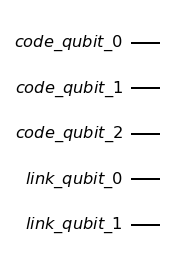

In [7]:
#Number of repetitions
d = 3
#Syndrome measuremnt rounds
T = 0

#Defining the Quantum Circuit
qc = QuantumCircuit()
# d code qubits
code_qubit = QuantumRegister(d,'code_qubit')
qc.add_register(code_qubit)
# d-1 auxiliary qubits
link_qubit = QuantumRegister(d-1, 'link_qubit')
qc.add_register(link_qubit)
qc.draw(output='mpl')

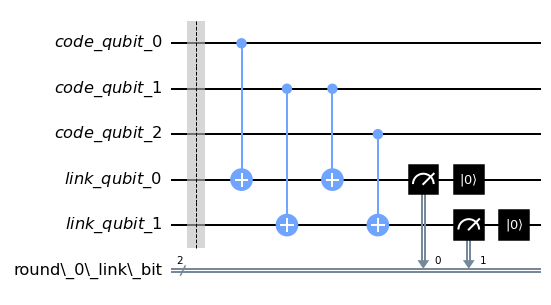

In [8]:
#CX Gate for each syndrome measurement
qc.barrier()

for j in range(d-1):
    qc.cx(code_qubit[j],link_qubit[j])
    
for j in range(d-1):
    qc.cx(code_qubit[j+1],link_qubit[j])
    
link_bit = ClassicalRegister(d-1, 'round_' + str(T) + '_link_bit')
qc.add_register(link_bit)

for j in range(d-1):
    qc.measure(link_qubit[j],link_bit[j])
    qc.reset(link_qubit[j])

T+=1

qc.draw(output='mpl')

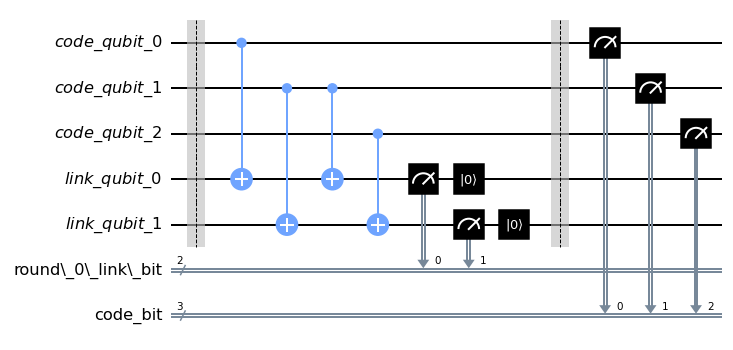

In [9]:
#Adding barrier
qc.barrier()

#Measuring the code qubits to code qubits classical register
code_bit = ClassicalRegister(d, 'code_bit')
qc.add_register(code_bit)

for j in range(d):
    qc.measure(code_qubit[j],code_bit[j])

#Drawing the circuit
qc.draw('mpl')

In [10]:
#Import the backend
from qiskit import Aer
backend_sim = Aer.get_backend('aer_simulator')

#Run the circuit and get counts/results
job = backend_sim.run(qc)
result = job.result()
counts = result.get_counts()
counts

{'000 00': 1024}

In [13]:
#QASM Examples of circuits
examples_qasm = ['OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nx code_qubit[0];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n', 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nx code_qubit[0];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n', 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nx code_qubit[0];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n', 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nx code_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n', 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nx code_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n', 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nx code_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n', 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\nx code_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n', 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nx link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n', 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nx link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n']

examples = []
for qasm in examples_qasm:
    #Convert QASM str to QuantumCircuit object and append it to the examples list
    examples.append(QuantumCircuit.from_qasm_str(qasm)) 

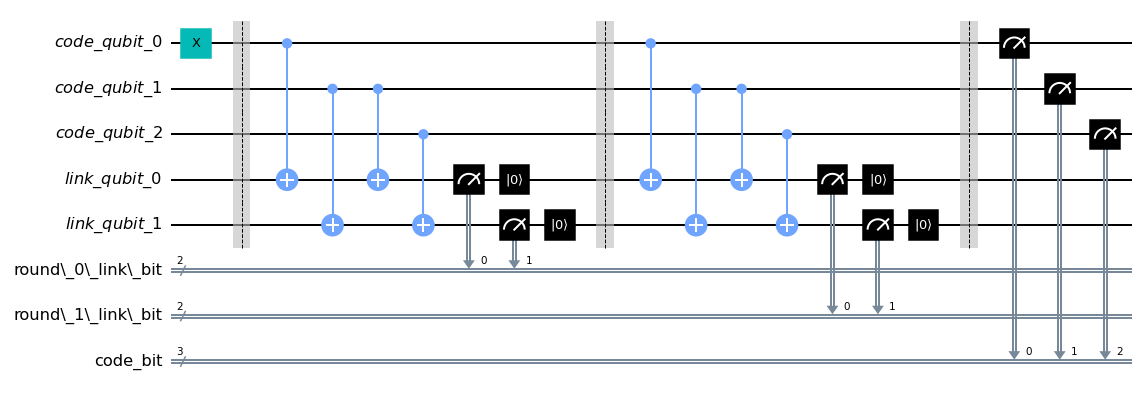

In [14]:
#Drawing the circuit
example = examples[0]
example.draw(output='mpl')

In [15]:
#Running the job on the backend
job = backend_sim.run(example)
counts = job.result().get_counts()
print(counts)

{'001 01 01': 1024}


In [28]:
def process_1(output):
    
    output = output.split(' ')
    logical = output[0][0]+' '+output[0][-1]

    final = ''
    for j in range(d-1):
        if output[0][j]==output[0][j+1]:
            final += '0'
        else:
            final += '1'
    output[0] = final     
    
    output = logical + '  ' + ' '.join(output)
    
    return output

output = list(counts.keys())[0]
process_1(output)

'0 1  01 01 01'

In [29]:
def process_2(output):
    
    output = output.split('  ')
    logical = output[0]
    syndrome = output[1].split(' ') [::-1]  
    
    changes = [syndrome[0]]
    for t in range(T):
        change = ''
        for j in range(d-1):
            if syndrome[t][j]==syndrome[t+1][j]:
                change += '0'
            else:
                change += '1'
        changes.append(change)
    
    output = logical + '  ' + ' '.join(changes[::-1])
    
    return output

process_2(process_1(output))

'0 1  00 01'

In [31]:
example = examples[0]

job = backend_sim.run(example)
counts = job.result().get_counts()

output = list(counts.keys())[0]
process_2(process_1(output))

'0 1  00 01'

## Topological codes

In [16]:
from topological_codes import RepetitionCode

In [17]:
d = 3
T = 2
code = RepetitionCode(d,T,resets=True)

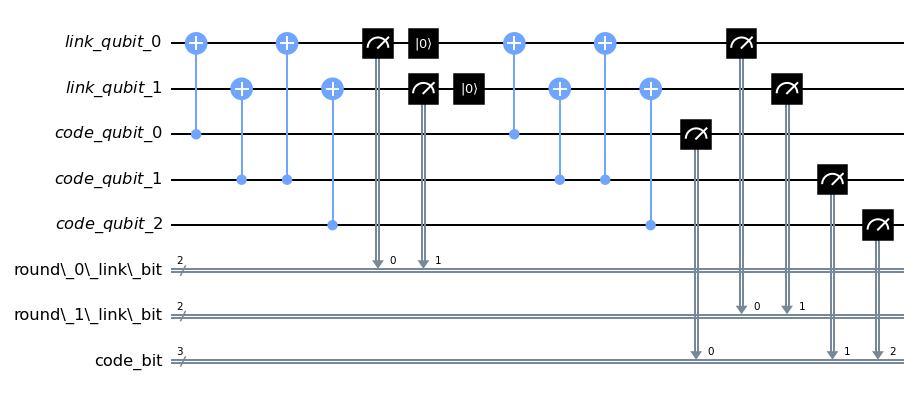

In [18]:
code.circuit['0'].draw('mpl')

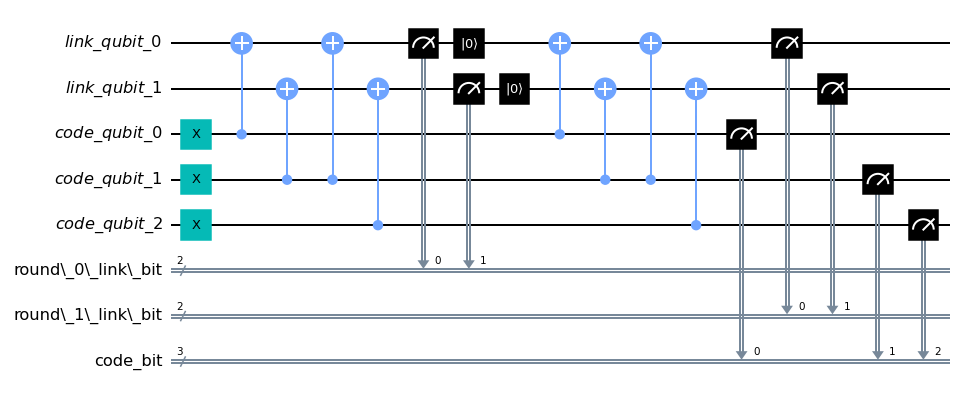

In [19]:
code.circuit['1'].draw('mpl')

In [20]:
job = backend_sim.run([code.circuit['0'], code.circuit['1']])
raw_results = {'0':job.result().get_counts(code.circuit['0']), '1':job.result().get_counts(code.circuit['1'])}
raw_results

{'0': {'000 00 00': 1024}, '1': {'111 00 00': 1024}}

In [21]:
results = code.process_results(raw_results)
results

{'0': {'0 0  00 00 00': 1024}, '1': {'1 1  00 00 00': 1024}}

In [22]:
#On real IBMQ device
from qiskit import IBMQ
provider = IBMQ.load_account()
#backend
backend = provider.get_backend('ibmq_manila')

In [23]:
#print details about the backend
import qiskit.tools.jupyter
backend

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

In [24]:
from qiskit import transpile

#Transpile the circuit
transpiled_circuits = {
    bit:transpile(code.circuit[bit], backend=backend) for bit in ['0','1']
}

In [25]:
#counting number of operators/gates
code.circuit['0'].count_ops()
transpiled_circuits['0'].count_ops()

OrderedDict([('cx', 13), ('measure', 7), ('reset', 2), ('barrier', 1)])

In [26]:
#counting the number of different qubits
code.circuit['0'].qubits

[Qubit(QuantumRegister(2, 'link_qubit'), 0),
 Qubit(QuantumRegister(2, 'link_qubit'), 1),
 Qubit(QuantumRegister(3, 'code_qubit'), 0),
 Qubit(QuantumRegister(3, 'code_qubit'), 1),
 Qubit(QuantumRegister(3, 'code_qubit'), 2)]

In [27]:
initial_layout = [
    1,
    3,
    0,
    2,
    4
]

transpiled_circuits = {
    bit:transpile(code.circuit[bit], backend=backend, initial_layout=initial_layout) for bit in ['0','1']
}

transpiled_circuits['0'].count_ops()

OrderedDict([('cx', 8), ('measure', 7), ('reset', 2)])

In [28]:
job = backend.run([transpiled_circuits['0'], transpiled_circuits['1']], shots=8192)


In [ ]:
#print(job.result().get_counts())